In [49]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from TotalCalculation import *
from preprocessing import *
import os
from datetime import datetime as dt

In [50]:
filename = image.getFilename(path=r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-21')
img = [cv2.cvtColor(cv2.imread(f),cv2.COLOR_BGR2RGB) for f in filename]
print(filename)

['C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638544996168477285.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638544998169161678.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545000169737274.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545002070021119.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545003870327105.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545005770362518.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545007770911155.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_c

In [51]:
filetime = []
extract_name = lambda x : int(os.path.splitext(os.path.basename(x))[0])
filetime = [extract_name(i) for i in filename]
decimal = [timeConvertion().datetime_to_decimal(time=timeConvertion().ticks_to_datetime(ticks=t,time_zone=7)) for t in filetime]
print(decimal)

[0.0044444444444444444, 0.060000000000000005, 0.11555555555555556, 0.1686111111111111, 0.21861111111111112, 0.2713888888888889, 0.3269444444444444, 0.3797222222222222, 0.4352777777777778, 0.4880555555555556, 0.5408333333333333, 0.596388888888889, 0.6547222222222222, 0.7269444444444445, 0.8019444444444445, 0.8769444444444445, 0.9519444444444444, 1.0269444444444444, 1.1019444444444446, 1.1769444444444446, 1.2519444444444445, 1.3269444444444445, 1.3991666666666667, 1.471388888888889, 1.5408333333333333, 1.6105555555555557, 1.6827777777777777, 1.7522222222222221, 1.8161111111111112, 1.8855555555555554, 1.952222222222222, 2.0244444444444443, 2.093888888888889, 2.1688888888888886, 2.2466666666666666, 2.3216666666666663, 2.3966666666666665, 2.4716666666666667, 2.5466666666666664, 2.6216666666666666, 2.6966666666666668, 2.7716666666666665, 2.8466666666666667, 2.924444444444444, 2.9994444444444444, 3.0744444444444445, 3.1494444444444443, 3.2247222222222223, 3.299722222222222, 3.374722222222222,

In [52]:
decimal = []
for i in filetime:    
    t = timeConvertion().ticks_to_datetime(ticks=i,time_zone=7)
    decimal.append(timeConvertion().datetime_to_decimal(time=t))

In [53]:
start_date = str(dt(t.year,1,1).date())
sunrise,sunset = SunPosition().SunriseSunset(location=[18.849417,98.9538],Time_zone=7,filename=filetime[7],start_date=start_date,include_end_date=True)
print(sunrise,sunset)

5.863020620227611 18.998388995225024


In [54]:
filtering = lambda x : (x > sunrise) & (x < sunset)
day_indices = [index for index, value in enumerate(decimal) if filtering(value)]
night_indices = [index for index, value in enumerate(decimal) if not filtering(value)]

In [55]:
Day_filename = [filename[i] for i in day_indices]
night_filename = [filename[i] for i in night_indices]

In [56]:
Day_filename,night_filename = image.extract_filename(filename=filename,sunrise=sunrise,sunset=sunset,time_zone=7)

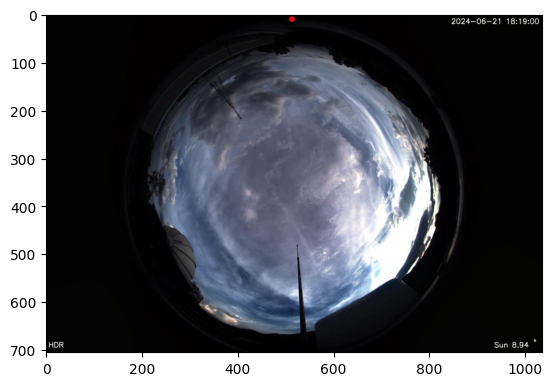

In [57]:
import cv2
from matplotlib import pyplot as plt
im = 325
images = []
images = [cv2.imread(i) for i in Day_filename]
images = [cv2.cvtColor(i,cv2.COLOR_BGR2RGB) for i in images]
plt.imshow(images[im])

In [58]:
crop_image = [preprocessData().crop_center(img=i,crop_size=570) for i in images]
Blue = [cv2.split(i)[2] for i in crop_image]
skewness = [preprocessData().calculate_skewness(data=B) for B in Blue]

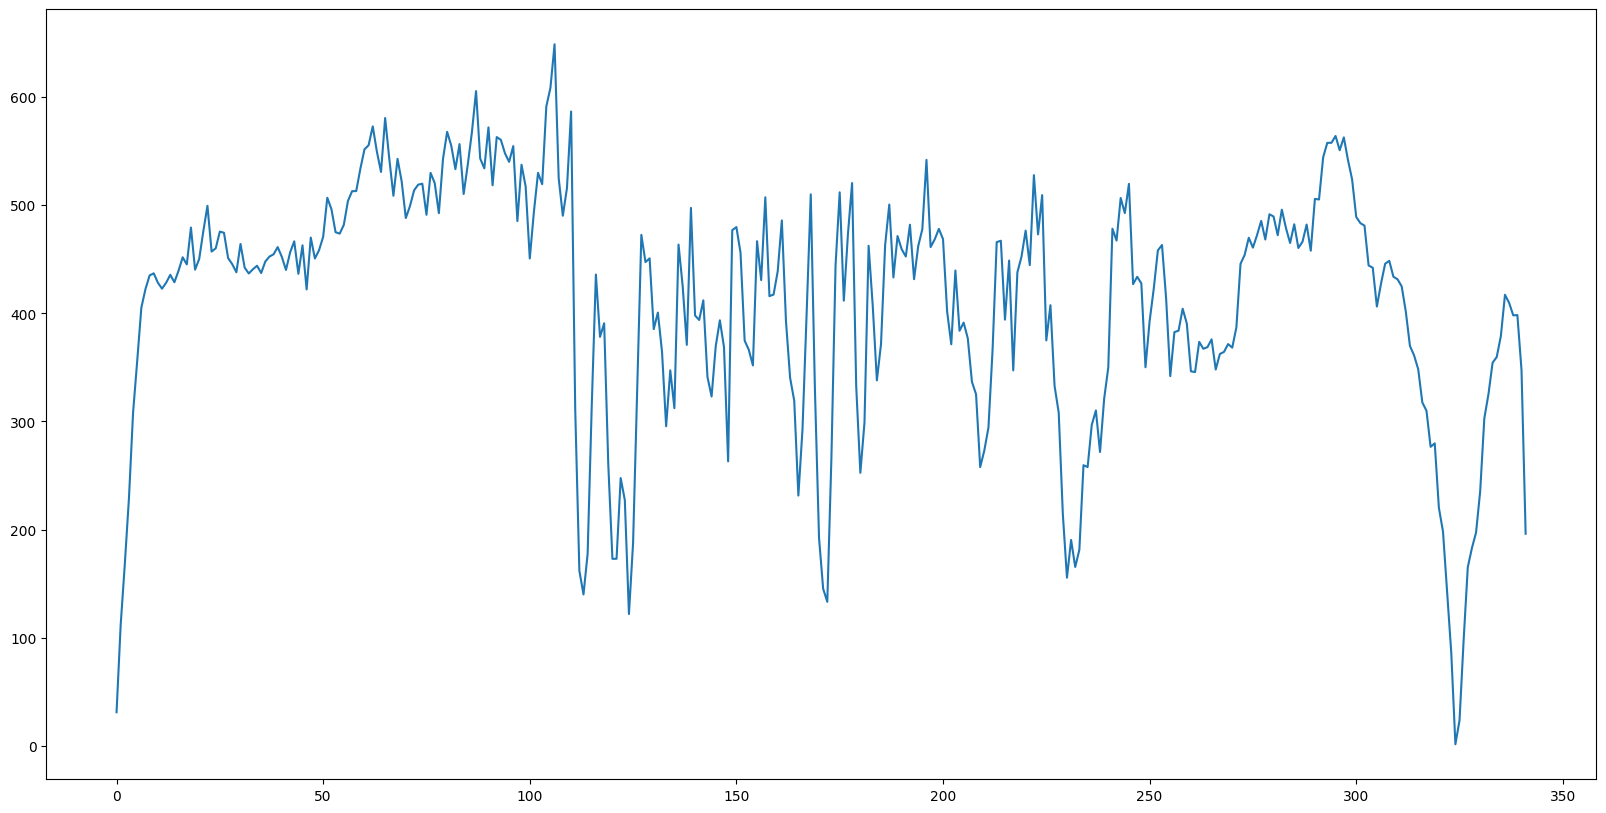

In [59]:
plt.figure(figsize=(20,10))
plt.plot(skewness)

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
df = pd.read_csv(r'C:\Users\ASUS\Documents\NARIT_internship_data\Output_HTML\Astropark\Astropark_Output.csv')

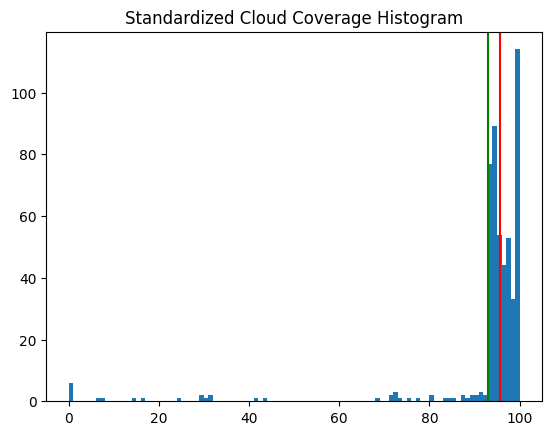

Mean :  Cloud_coverage %    93.090603
dtype: float64


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [96]:
std = StandardScaler()
clarity = df[['Cloud_coverage %']]
x = np.array(std.fit_transform(clarity)).reshape(-1, 1)

# Plot histogram of the standardized data
plt.hist(x=np.array(clarity), bins=100)
plt.axvline(np.median(np.array(clarity)),c='r')
plt.axvline(np.mean(np.array(clarity)),c='g')
plt.title('Standardized Cloud Coverage Histogram')
plt.show()

print("Mean : ", np.mean(clarity))


In [97]:
df["Cloud_coverage %"].describe()

count    508.000000
mean      93.090603
std       15.432470
min        0.008600
25%       94.061513
50%       95.687392
75%       98.724769
max      100.000000
Name: Cloud_coverage %, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec9e050d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec9e051270>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec9e050a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec9e0517b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec9e051a50>],
 'means': []}

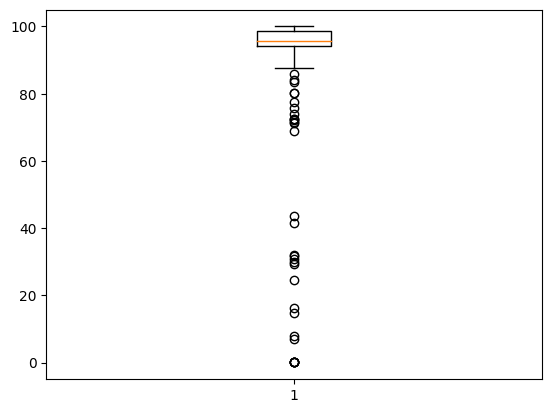

In [98]:
plt.boxplot(df['Cloud_coverage %'])

In [7]:
import pickle 

with open(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\models\PCA\PCA_2.pkl','rb') as pca:
    PCA = pickle.load(pca)
with open(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\models\Scaler\StandardScaler.pkl','rb') as scaler:
    Scaler = pickle.load(scaler)
with open(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\models\kmean_model_2PCA.pkl','rb') as kmean:
    Kmean = pickle.load(kmean)

In [9]:
scaler.transform()
print(Kmean.cluster_centers_[1])

[ 0.70104517 -0.15998201]


In [4]:
import pandas as pd
import numpy as np

output = pd.read_csv(r'C:\Users\ASUS\Documents\NARIT_internship_data\Output_HTML\Astropark\Astropark_Output.csv')

In [8]:
classes = np.unique(output['Kmean_clustering'])
print("Different classes : ",classes)
print("Each class count : ",pd.value_counts(output['Kmean_clustering']))

Different classes :  [1 3 4]
Each class count :  4    19
3    10
1     1
Name: Kmean_clustering, dtype: int64


In [9]:
values = pd.value_counts(output['GMM_model'])
print("Different classes : ",np.unique(output['GMM_model']))
print("Each class count : ",pd.value_counts(output['GMM_model']))
print("percentage for each class : ",)

Different classes :  [1 4]
Each class count :  1    16
4    14
Name: GMM_model, dtype: int64
